# 09 - Portfolio Analysis

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels as lm

import datetime as dt

import matplotlib.pyplot as plt
#import seaborn as sns

In [3]:
import sys
sys.path.append('../')
sys.path.append('../../kungfu/')
import kungfu as kf

/home/fbrun/.local/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Settings

In [4]:
pd.set_option('display.float_format', lambda x: '%.4f' % x) #sets decimals to be displayed

In [5]:
%matplotlib inline

In [6]:
#sns.set()
#sns.set(rc={'figure.figsize': (17, 6)})

In [7]:
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [17, 8]
#plt.rcParams['figure.dpi'] = 80

## Load estimates

In [8]:
# #
# estimation_stats = pd.read_csv('../data/estimated/estimation_statistics.csv')
# estimation_stats.index = pd.to_datetime(estimation_stats.iloc[:, 0].values)
# estimation_stats = estimation_stats.iloc[:,1:]

#
network_data = pd.read_csv('../data/estimated/network_data.csv')
network_data.sampling_date = pd.to_datetime(network_data.sampling_date)
network_data.permno = network_data.permno.astype('int').astype('str')
network_data = network_data.set_index(['sampling_date', 'permno'])

#
df_stats = pd.read_csv('../data/estimated/summary_stats.csv')
df_stats.sampling_date = pd.to_datetime(df_stats.sampling_date)
df_stats.permno = df_stats.permno.astype('str')
df_stats = df_stats.set_index(['sampling_date', 'permno'])#drop(columns=['sampling_date'])

#
df_factor = pd.read_csv('../data/estimated/factor_exposures.csv')
df_factor.sampling_date = pd.to_datetime(df_factor.sampling_date)
df_factor.permno = df_factor.permno.astype('str')
df_factor = df_factor.set_index(['sampling_date', 'permno'])#drop(columns=['sampling_date'])

# #
# df_spy = pd.read_csv('../data/estimated/spy_stats.csv')
# df_spy.index = pd.to_datetime(df_spy.iloc[:, 0].values)
# df_spy = df_spy.iloc[:,1:]

In [9]:
df_merged = network_data.merge(df_stats, left_index=True, right_on=['sampling_date', 'permno'])\
                        .merge(df_factor, left_index=True, right_on=['sampling_date', 'permno'])
df_merged.index = pd.MultiIndex.from_arrays([df_merged.index.get_level_values('permno').astype('int'),
                                             df_merged.index.get_level_values('sampling_date')])

In [10]:
df_merged.head(2)

,,var_intercept,mean_abs_var_in,mean_abs_var_out,residual_variance,mean_resid_corr,fev_total,fev_others,fev_self,fev_in_connectedness,fev_out_connectedness,...,ff3_hml_forward_12M,c4_alpha_forward_12M,c4_mktrf_forward_12M,c4_smb_forward_12M,c4_hml_forward_12M,c4_umd_forward_12M,spy_capm_sigma2_forward_12M,capm_sigma2_forward_12M,ff3_sigma2_forward_12M,c4_sigma2_forward_12M
permno,sampling_date,,,,,,,,,,,,,,,,,,,,,
10104,1994-01-31,-7.7515,0.0147,0.0119,1.2066,0.0262,1.3263,0.3808,1.2200,0.2871,0.2661,...,-3.0052,0.0015,1.4148,0.0175,-2.3695,1.7032,0.0006,0.0005,0.0004,0.0004
10107,1994-01-31,-3.5757,0.0131,0.0126,0.8587,0.0113,0.9683,0.1905,0.8603,0.1967,0.1073,...,-1.1873,0.0014,1.0514,-0.6759,-1.2011,-0.0370,0.0002,0.0002,0.0002,0.0002


In [11]:
df_merged.columns.to_list()

['var_intercept',
 'mean_abs_var_in',
 'mean_abs_var_out',
 'residual_variance',
 'mean_resid_corr',
 'fev_total',
 'fev_others',
 'fev_self',
 'fev_in_connectedness',
 'fev_out_connectedness',
 'fev_eigenvector_centrality',
 'fev_closeness_centrality',
 'fev_in_entropy',
 'fev_in_connectedness_normalised',
 'fev_out_connectedness_normalised',
 'fev_eigenvector_centrality_normalised',
 'fev_closeness_centrality_normalised',
 'fu_total',
 'fu_others',
 'fu_self',
 'fu_in_connectedness',
 'fu_out_connectedness',
 'fu_eigenvector_centrality',
 'fu_closeness_centrality',
 'fu_in_entropy',
 'fu_in_connectedness_normalised',
 'fu_out_connectedness_normalised',
 'fu_eigenvector_centrality_normalised',
 'fu_closeness_centrality_normalised',
 'ret_back_12M',
 'var_back_12M',
 'ret_forward_1M',
 'var_forward_1M',
 'ret_forward_2M',
 'var_forward_2M',
 'ret_forward_3M',
 'var_forward_3M',
 'ret_forward_4M',
 'var_forward_4M',
 'ret_forward_5M',
 'var_forward_5M',
 'ret_forward_6M',
 'var_forward_

In [17]:
df_contemporaneous = kf.FinancialDataFrame(index=df_merged.index)
# df_sort['fev_others'] = df_merged['fev_others']

# df_sort['$c^{out}$'] = df_merged['fev_out_connectedness']
# df_sort['$c^{out}-c^{in}$'] = df_merged['fev_out_connectedness']-df_merged['fev_in_connectedness']

# network stats
df_contemporaneous['centrality $x_i$'] = df_merged['fev_eigenvector_centrality']
df_contemporaneous['in-connectedness $c_i^{in}$'] = df_merged['fev_in_connectedness']
df_contemporaneous['out-connectedness $c_i^{out}$'] = df_merged['fev_out_connectedness']
df_contemporaneous['in-diversification $H_i$'] = df_merged['fev_in_entropy']

# contemporaneous
df_contemporaneous['return $r_i$'] = df_merged['ret_back_12M']
df_contemporaneous['volatility $\sigma_i$'] = df_merged['var_back_12M']**0.5
df_contemporaneous['CAPM beta $beta_i$'] = df_merged['spy_capm_spy_back_12M']
df_contemporaneous['CAPM alpha $alpha_i$'] = df_merged['spy_capm_alpha_back_12M']*252
df_contemporaneous['non-systematic volatility $\sigma(\epsilon_i)$'] = (df_merged['spy_capm_sigma2_back_12M']*252)**.5

In [31]:
sorting = 'centrality $x_i$'
df_contemporaneous['portfolio'] = df_contemporaneous[sorting].groupby('sampling_date').apply(lambda x: pd.qcut(x, q=5, labels=False))
sort_table = df_contemporaneous.groupby('portfolio').mean().T
sort_table.columns = ['peripheral', 2, 3, 4, 'central']
sort_table = sort_table.iloc[:, ::-1]
sort_table['CMP'] = sort_table['central'] - sort_table['peripheral']
sort_table

,central,4,3,2,peripheral,CMP
centrality $x_i$,0.1750,0.0910,0.0602,0.0386,0.0188,0.1562
in-connectedness $c_i^{in}$,1.7010,1.1996,0.9157,0.6761,0.4059,1.2952
out-connectedness $c_i^{out}$,1.7635,1.2190,0.9144,0.6520,0.3494,1.4141
in-diversification $H_i$,0.8324,0.8587,0.8643,0.8599,0.8501,-0.0177
return $r_i$,0.2133,0.1818,0.1746,0.1656,0.1564,0.0570
volatility $\sigma_i$,0.3253,0.3085,0.2965,0.2861,0.2703,0.0549
CAPM beta $beta_i$,1.2407,1.0953,0.9899,0.8650,0.6832,0.5575
CAPM alpha $alpha_i$,0.0543,0.0529,0.0596,0.0630,0.0756,-0.0214
non-systematic volatility $\sigma(\epsilon_i)$,0.2411,0.2373,0.2351,0.2365,0.2370,0.0041


In [39]:
df_predictive = kf.FinancialDataFrame(index=df_merged.index)

# sorting
df_predictive['sorting'] = df_merged['fev_eigenvector_centrality']
# df_predictive['sorting'] = df_merged['fev_in_entropy']

# levels
df_predictive['return $r_i$'] = df_merged['ret_forward_12M']
df_predictive['volatility $\sigma_i$'] = df_merged['var_forward_12M']**0.5
df_predictive['CAPM beta $ beta_i$'] = df_merged['spy_capm_spy_forward_12M']
df_predictive['CAPM alpha $ alpha_i$'] = df_merged['spy_capm_alpha_forward_12M']*252
df_predictive['non-systematic volatility $\sigma(\epsilon_i)$'] = (df_merged['spy_capm_sigma2_forward_12M']*252)**.5

# changes
df_predictive['volatility $\Delta\sigma_i$'] = df_merged['var_forward_12M']**0.5 - df_merged['var_back_12M']**0.5
# df_sort['return $\Delta r_i$'] = df_merged['ret_forward_12M'] - df_merged['ret_back_12M']
df_predictive['CAPM beta $\Delta beta_i$'] = df_merged['spy_capm_spy_forward_12M'] - df_merged['spy_capm_spy_back_12M']
df_predictive['CAPM alpha $\Delta alpha_i$'] = df_merged['spy_capm_alpha_forward_12M']*252 - df_merged['spy_capm_alpha_back_12M']*252
df_predictive['non-systematic volatility $\Delta\sigma(\epsilon_i)$'] = (df_merged['spy_capm_sigma2_forward_12M']*252)**.5 - (df_merged['spy_capm_sigma2_back_12M']*252)**.5

In [40]:
df_predictive['portfolio'] = df_predictive['sorting'].groupby('sampling_date').apply(lambda x: pd.qcut(x, q=5, labels=False))
sort_table = df_predictive.drop(columns='sorting').groupby('portfolio').mean().T
sort_table.columns = ['peripheral', 2, 3, 4, 'central']
sort_table = sort_table.iloc[:, ::-1]
sort_table['CMP'] = sort_table['central'] - sort_table['peripheral']
sort_table

,central,4,3,2,peripheral,CMP
return $r_i$,0.1018,0.0845,0.0863,0.0894,0.0964,0.0054
volatility $\sigma_i$,0.3391,0.3171,0.3049,0.2942,0.2744,0.0647
CAPM beta $ beta_i$,1.1926,1.0597,0.9750,0.8978,0.7670,0.4256
CAPM alpha $ alpha_i$,0.0015,-0.0063,-0.0021,-0.0030,0.0168,-0.0153
non-systematic volatility $\sigma(\epsilon_i)$,0.2540,0.2461,0.2424,0.2409,0.2334,0.0206
volatility $\Delta\sigma_i$,0.0167,0.0124,0.0126,0.0121,0.0084,0.0083
CAPM beta $\Delta beta_i$,-0.0527,-0.0350,-0.0117,0.0377,0.0871,-0.1398
CAPM alpha $\Delta alpha_i$,-0.0568,-0.0627,-0.0642,-0.0656,-0.0493,-0.0075
non-systematic volatility $\Delta\sigma(\epsilon_i)$,0.0129,0.0089,0.0081,0.0050,-0.0015,0.0143


In [41]:
table = kf.FinancialDataFrame(sort_table)
table.export_to_latex(path='../reports/tables/')

../../kungfu/kungfu/frame.py:116: UserWarning: Writing to LaTeX format using pandas method. Consider            using kungfu method export_to_latex for preset formatiing
  using kungfu method export_to_latex for preset formatiing')


In [231]:
pfs = df_sort.sort_portfolios('endog', ['control', 'exog'], 3, lag=0, method='sequential')
pfs.summarise_performance(1)

KeyError: "['exog'] not in index"

In [113]:
mean_table = pfs.returns.unstack().mean()
mean_table.index = pd.MultiIndex.from_tuples(mean_table.index)
mean_table.unstack()

,1,2,3
1,0.0181,0.0214,0.0232
2,0.0068,0.0117,0.0148
3,-0.0162,-0.0146,-0.0062


# Sort

In [19]:
df_daily['in'] = df_daily['in'].groupby('permno').fillna(method='ffill')
df_pf_daily = df_daily[df_daily['daily_ret'].notna()].swaplevel(0,1)

In [237]:
pf_daily = df_pf_daily.sort_portfolios('daily_ret', 'in', 5, lag=0)

In [238]:
pf_daily.summarise_performance(252)

,1,2,3,4,5
Return p.a. (arithmetic),0.0846,0.0891,0.0975,0.0999,0.0746
Return p.a. (geometric),0.0786,0.0779,0.0813,0.0779,0.0200
Volatility p.a.,0.1342,0.1678,0.1968,0.2233,0.3315
Sharpe ratio,0.5856,0.4640,0.4130,0.3488,0.0604
t-stat,2.7472,2.3115,2.1582,1.9489,0.9804
Total return,3.1965,3.1450,3.4017,3.1465,0.4568
Positive returns %,53.8606,53.0864,53.5468,53.5258,52.1866
VaR 95% (historic),-0.0124,-0.0160,-0.0185,-0.0216,-0.0311
VaR 95% (parametric),-0.0136,-0.0170,-0.0200,-0.0227,-0.0341
Expected shortfall 95%,-0.0199,-0.0255,-0.0296,-0.0335,-0.0495


No handles with labels found to put in legend.


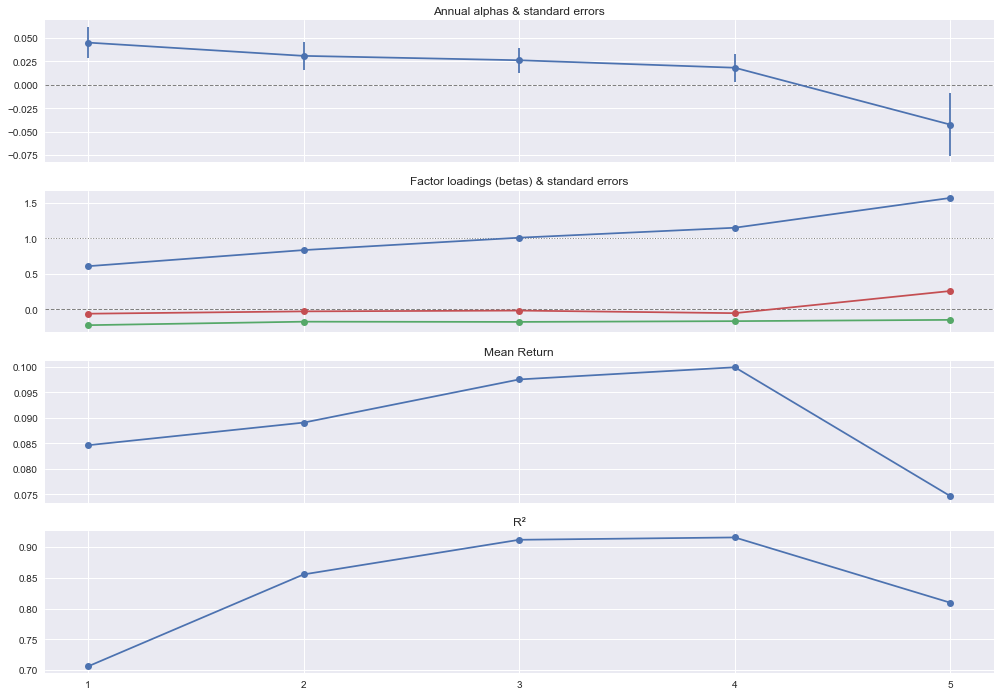

In [239]:
_ = ff3f.fit(pf_daily.returns.unstack()).plot_results(252, figsize=[17,12])

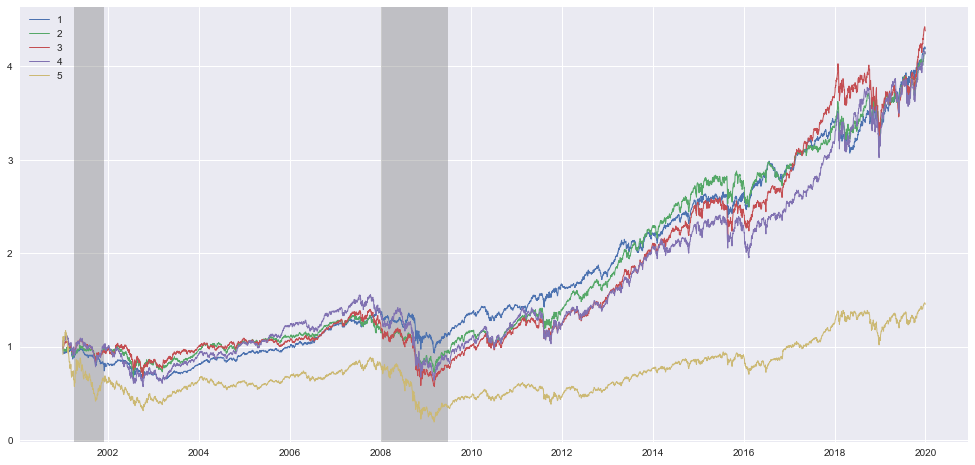

In [240]:
_ = pf_daily.plot_indices()

In [223]:
ts = pf_daily.returns.unstack()
new = ts.copy()
for i, ser in ts.iteritems():
    new[i] = ser.set_obstype('return').to_prices()
new.mean()#.summarise_performance()

1   1.7725
2   1.7688
3   1.7240
4   1.6642
5   0.7279
dtype: float64

In [232]:
new.pct_change().summarise_performance(annual_obs=252)

,1,2,3,4,5
Return p.a. (arithmetic),0.0851,0.0896,0.0984,0.1007,0.0789
Return p.a. (geometric),0.0791,0.0785,0.0823,0.0787,0.0246
Volatility p.a.,0.1341,0.1678,0.1968,0.2232,0.3310
Sharpe ratio,0.5894,0.4677,0.4181,0.3525,0.0744
t-stat,2.7623,2.3261,2.1784,1.9635,1.0383
Total return,3.2325,3.1889,3.4767,3.2051,0.5857
Positive returns %,53.8510,53.0766,53.5370,53.5161,52.1766
VaR 95% (historic),-0.0124,-0.0160,-0.0184,-0.0216,-0.0311
VaR 95% (parametric),-0.0136,-0.0170,-0.0200,-0.0227,-0.0340
Expected shortfall 95%,-0.0199,-0.0255,-0.0296,-0.0335,-0.0493


In [23]:
df_daily['capm_mktrf_est'] = df_daily['capm_mktrf_est'].groupby('permno').fillna(method='ffill')
df_pf_daily = df_daily[df_daily['daily_ret'].notna()].swaplevel(0,1)

In [24]:
pf_daily = df_pf_daily.sort_portfolios('daily_ret', 'capm_mktrf_est', 5, lag=0)

In [229]:
pf_daily.summarise_performance(252)

,1,2,3,4,5
Return p.a. (arithmetic),0.0846,0.0891,0.0975,0.0999,0.0746
Return p.a. (geometric),0.0786,0.0779,0.0813,0.0779,0.0200
Volatility p.a.,0.1342,0.1678,0.1968,0.2233,0.3315
Sharpe ratio,0.5856,0.4640,0.4130,0.3488,0.0604
t-stat,2.7472,2.3115,2.1582,1.9489,0.9804
Total return,3.1965,3.1450,3.4017,3.1465,0.4568
Positive returns %,53.8606,53.0864,53.5468,53.5258,52.1866
VaR 95% (historic),-0.0124,-0.0160,-0.0185,-0.0216,-0.0311
VaR 95% (parametric),-0.0136,-0.0170,-0.0200,-0.0227,-0.0341
Expected shortfall 95%,-0.0199,-0.0255,-0.0296,-0.0335,-0.0495


In [228]:
(pf_daily.returns.unstack()+1).prod()**(1/252)-1

1   0.0057
2   0.0057
3   0.0059
4   0.0057
5   0.0015
dtype: float64

No handles with labels found to put in legend.


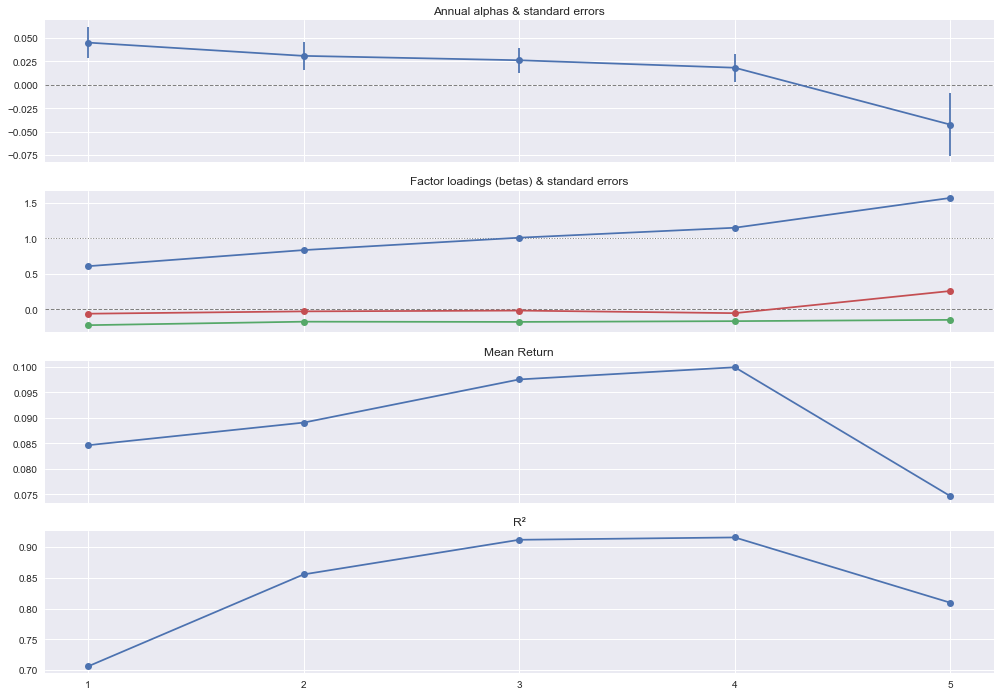

In [230]:
ff3f = kf.FactorModel(df_ff_raw[['mktrf','smb','hml']])
_ = ff3f.fit(pf_daily.returns.unstack()).plot_results(252, figsize=[17,12])

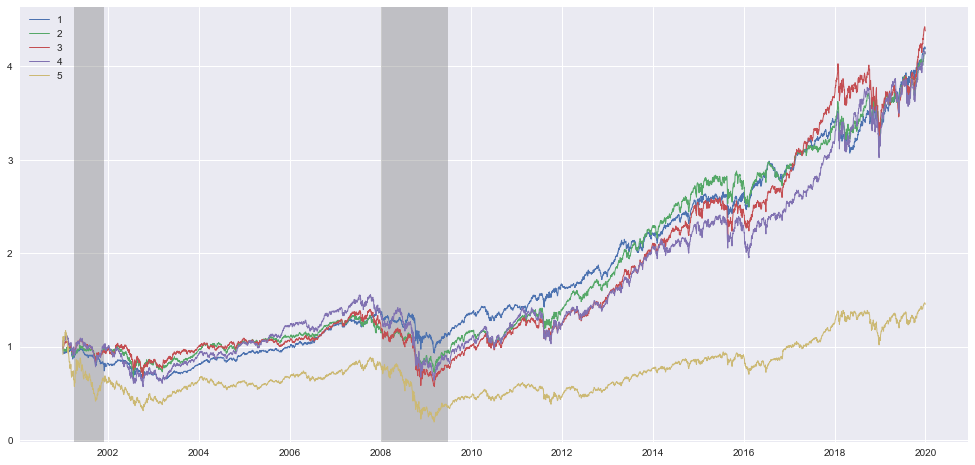

In [231]:
_ = pf_daily.plot_indices()

In [28]:
pf_daily = df_pf_daily.sort_portfolios('daily_ret', ['capm_mktrf_est','in'], [3,3], lag=0, method='sequential')

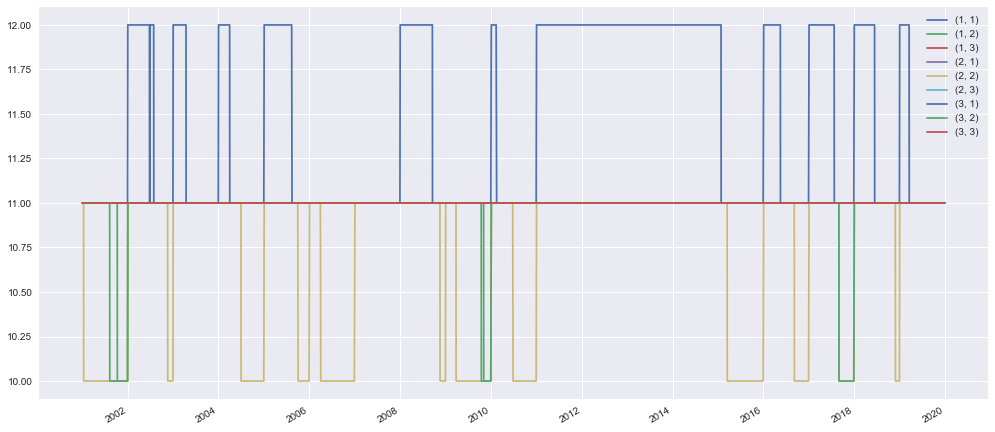

In [29]:
pf_daily.size.unstack().plot()

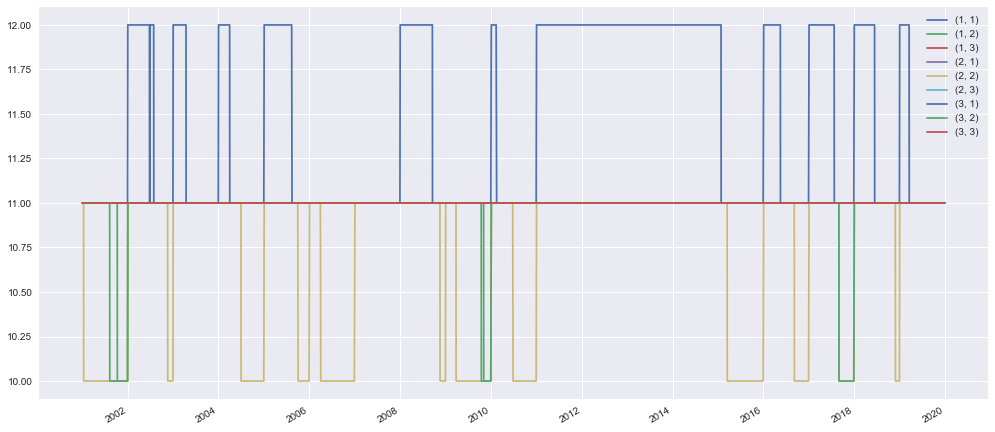

In [30]:
pf_daily.size.unstack().plot()

In [31]:
pf_daily.summarise_performance(252)

,"(1, 1)","(1, 2)","(1, 3)","(2, 1)","(2, 2)","(2, 3)","(3, 1)","(3, 2)","(3, 3)"
Return p.a. (arithmetic),0.0987,0.0870,0.0808,0.0717,0.1071,0.1055,0.1070,0.0915,0.0533
Return p.a. (geometric),0.0941,0.0792,0.0689,0.0528,0.0912,0.0867,0.0796,0.0531,-0.0183
Volatility p.a.,0.1329,0.1465,0.1682,0.2012,0.1993,0.2111,0.2467,0.2818,0.3799
Sharpe ratio,0.7078,0.5404,0.4098,0.2622,0.4575,0.4107,0.3227,0.1886,-0.0481
t-stat,3.2351,2.5842,2.0925,1.5509,2.3412,2.1757,1.8885,1.4134,0.6114
Total return,4.5013,3.2423,2.5393,1.6509,4.2323,3.8404,3.2730,1.6700,-0.2953
Positive returns %,53.7769,53.4003,53.2957,53.2120,53.6932,53.4003,53.0864,52.5633,51.9356
VaR 95% (historic),-0.0122,-0.0142,-0.0161,-0.0193,-0.0185,-0.0201,-0.0233,-0.0265,-0.0344
VaR 95% (parametric),-0.0134,-0.0148,-0.0171,-0.0206,-0.0202,-0.0215,-0.0251,-0.0288,-0.0392
Expected shortfall 95%,-0.0194,-0.0220,-0.0259,-0.0302,-0.0299,-0.0316,-0.0367,-0.0413,-0.0567


In [32]:
df_pf_daily

,,daily_ret,year,in,out,capm_alpha_est,capm_mktrf_est,ff3f_alpha_est,ff3f_mktrf_est,ff3f_smb_est,ff3f_hml_est,...,c4f_hml_ana,c4f_umd_ana,ret1M_ana,ret3M_ana,ret12M_ana,ret_ana,vola1M_ana,vola3M_ana,vola12M_ana,vola_ana
permno,date,,,,,,,,,,,,,,,,,,,,,
10078,2001-01-02,-0.0874,nan,0.0109,nan,nan,1.9652,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10104,2001-01-02,-0.0925,nan,0.0120,nan,nan,2.1350,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10107,2001-01-02,0.0000,nan,0.0043,nan,nan,1.2951,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10145,2001-01-02,-0.0647,nan,0.0027,nan,nan,0.6965,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10147,2001-01-02,-0.1833,nan,0.0097,nan,nan,1.8581,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91937,2019-12-31,0.0044,nan,0.0030,nan,nan,0.8486,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
92602,2019-12-31,-0.0071,nan,0.0013,nan,nan,0.4136,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
92611,2019-12-31,0.0004,nan,0.0063,nan,nan,1.2539,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


## TRIAL

In [177]:
test = kf.Portfolio(asset_returns=df_pf_daily['daily_ret'].swaplevel(0,1))
test.weights = asset_returns=df_pf_daily['capm_mktrf_est'].swaplevel(0,1)

In [196]:
test = test.set_equal_weights(all_periods=True)

../../kungfu\kungfu\portfolio.py:325: UserWarning: weights will be overridden
  warnings.warn('weights will be overridden')


In [194]:
test = test.set_equal_weights(all_periods=False)

../../kungfu\kungfu\portfolio.py:325: UserWarning: weights will be overridden
  warnings.warn('weights will be overridden')


In [197]:
test.merged_data

return   price  weight
date       permno                        
2001-01-02 10078  -0.0874  0.9126  0.0101
           10104  -0.0925  0.9075  0.0101
           10107   0.0000  1.0000  0.0101
           10145  -0.0647  0.9353  0.0101
           10147  -0.1833  0.8167  0.0101
...                   ...     ...     ...
2019-12-31 91937   0.0044  1.3577  0.0101
           92602  -0.0071  2.7983  0.0101
           92611   0.0004  9.2339  0.0101
           92655   0.0004 19.3868  0.0101
           93436   0.0088  1.2461  0.0101

[473464 rows x 3 columns]

In [198]:
test.weights.groupby('date').count()

date
2001-01-02    99
2001-01-03    99
2001-01-04    99
2001-01-05    99
2001-01-08    99
              ..
2019-12-24    99
2019-12-26    99
2019-12-27    99
2019-12-30    99
2019-12-31    99
Name: weight, Length: 4779, dtype: int64

In [180]:
test = test.rebalance('discrete')

../../kungfu\kungfu\portfolio.py:226: UserWarning: quantities will be overridden
  warnings.warn('quantities will be overridden')
../../kungfu\kungfu\portfolio.py:325: UserWarning: weights will be overridden
  warnings.warn('weights will be overridden')


In [185]:
test = test.rebalance('continuous')

../../kungfu\kungfu\portfolio.py:325: UserWarning: weights will be overridden
  warnings.warn('weights will be overridden')


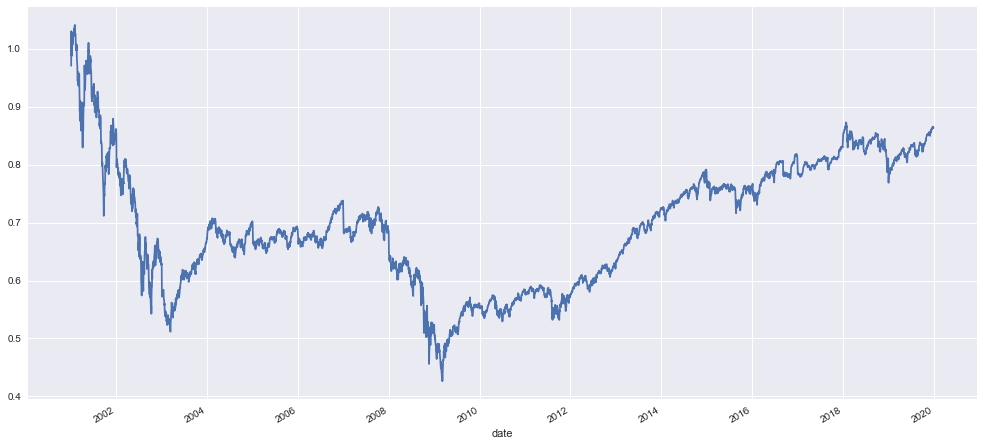

In [186]:
test.value.plot()

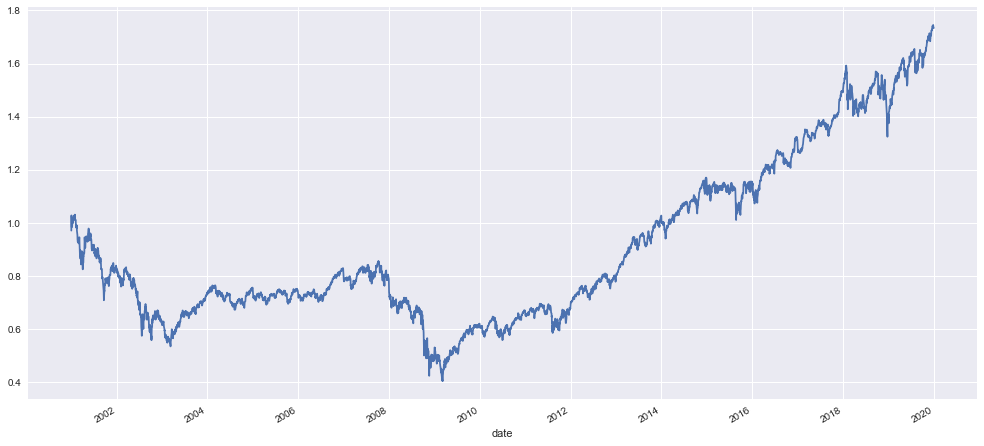

In [182]:
test.value.plot()

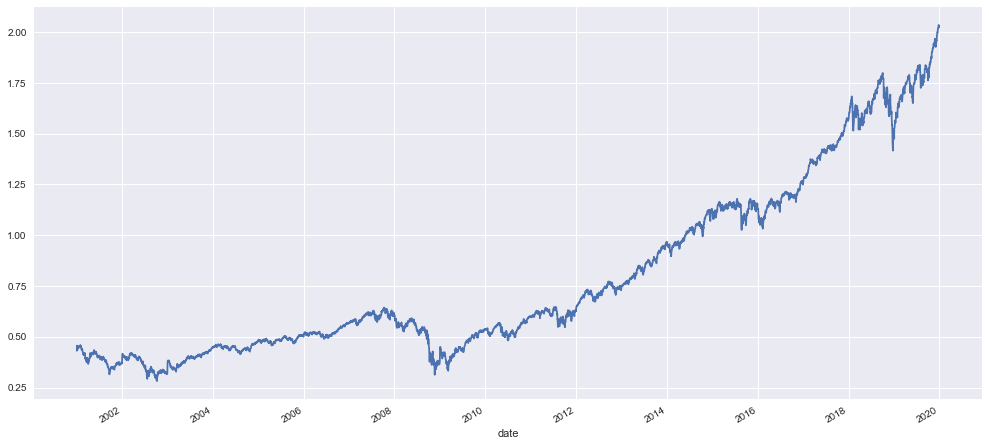

In [62]:
test.value.plot()

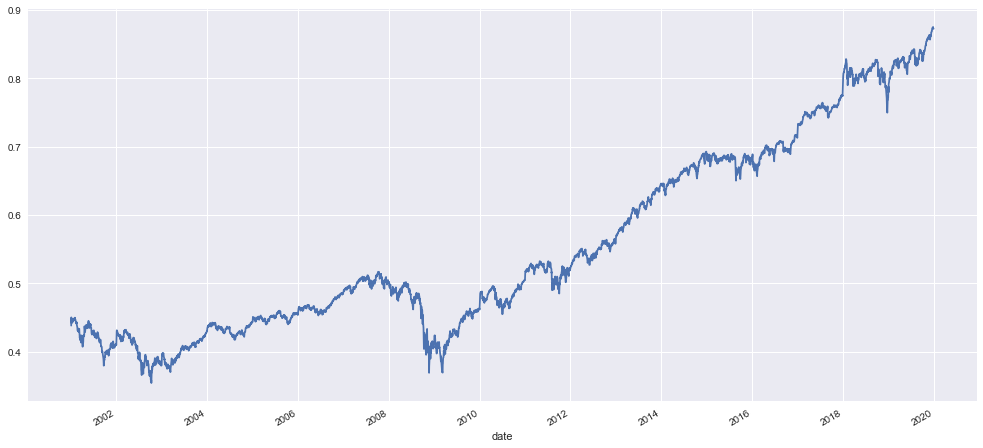

In [57]:
test.value.plot()

In [411]:
test.infer_quantities().merged_data

../../kungfu\kungfu\portfolio.py:243: UserWarning: # EXTEND TO MAKE VALUE DYNAMIC
  # require weights data


return   price  quantity  weight
date       permno                                  
2001-01-02 10078  -0.0874  0.9126    0.0111  0.0101
           10104  -0.0925  0.9075    0.0111  0.0101
           10107   0.0000  1.0000    0.0101  0.0101
           10145  -0.0647  0.9353    0.0108  0.0101
           10147  -0.1833  0.8167    0.0124  0.0101
...                   ...     ...       ...     ...
2019-12-31 91937   0.0044  1.3577    0.0074  0.0101
           92602  -0.0071  2.7983    0.0036  0.0101
           92611   0.0004  9.2339    0.0011  0.0101
           92655   0.0004 19.3868    0.0005  0.0101
           93436   0.0088  1.2461    0.0081  0.0101

[473464 rows x 4 columns]

In [400]:
test.merged_data#['weight'].groupby('date').sum()

return  weight
date       permno                
2001-01-02 10078  -0.0874  0.0101
           10104  -0.0925  0.0101
           10107   0.0000  0.0101
           10145  -0.0647  0.0101
           10147  -0.1833  0.0101
...                   ...     ...
2019-12-31 91937   0.0044  0.0101
           92602  -0.0071  0.0101
           92611   0.0004  0.0101
           92655   0.0004  0.0101
           93436   0.0088  0.0101

[473464 rows x 2 columns]

In [408]:
test.returns.summarise_performance(252)

Return p.a. (arithmetic)    0.0892
Return p.a. (geometric)     0.0726
Volatility p.a.             0.1951
Sharpe ratio                0.3723
t-stat                      1.9903
Total return                2.7798
Positive returns %         54.0490
VaR 95% (historic)         -0.0188
VaR 95% (parametric)       -0.0199
Expected shortfall 95%     -0.0295
Downside volatility         0.2018
Maximum drawdown           -0.5595
dtype: float64

In [397]:
test.asset_returns.reset_index().groupby(test.asset_id).first()['date']

permno
10078   2001-01-02
10104   2001-01-02
10107   2001-01-02
10145   2001-01-02
10147   2001-01-02
           ...    
91937   2017-01-03
92602   2010-01-04
92611   2010-01-04
92655   2002-01-02
93436   2019-01-02
Name: date, Length: 223, dtype: datetime64[ns]

In [390]:
test.start_date

Timestamp('2001-01-02 00:00:00')

In [334]:
test = test.infer_quantities()#.merged_data

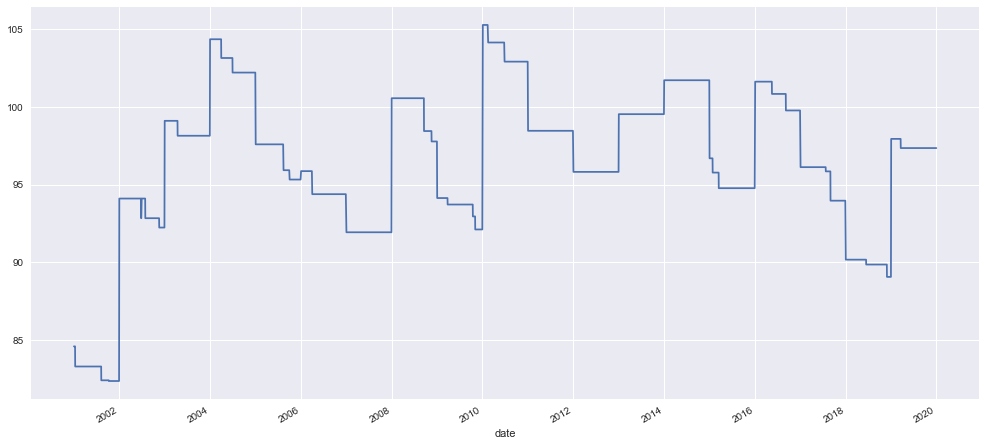

In [337]:
test.value.plot()

In [339]:
test.set_equal_quantities()

../../kungfu\kungfu\portfolio.py:287: UserWarning: Need to implement adding assets over time
  warning.warn('Need to implement adding assets over time')
../../kungfu\kungfu\portfolio.py:226: UserWarning: quantities will be overridden
  warnings.warn('quantities will be overridden')
../../kungfu\kungfu\portfolio.py:322: UserWarning: weights will be overridden
  warnings.warn('weights will be overridden')


In [279]:
test.merged_data['weight'].groupby('date').sum()

date
2001-01-02   84.5980
2001-01-03   84.5980
2001-01-04   84.5980
2001-01-05   84.5980
2001-01-08   84.5980
               ...  
2019-12-24   97.3554
2019-12-26   97.3554
2019-12-27   97.3554
2019-12-30   97.3554
2019-12-31   97.3554
Name: weight, Length: 4779, dtype: float64

In [290]:
test = test.scale_weights()

../../kungfu\kungfu\portfolio.py:324: UserWarning: weights will be overridden
  warnings.warn('weights will be overridden')


In [291]:
isinstance([1,2],tuple)

False

In [292]:
test.merged_data

return   price  weight
date       permno                        
2001-01-02 10078  -0.0874  0.9126  0.0232
           10104  -0.0925  0.9075  0.0252
           10107   0.0000  1.0000  0.0153
           10145  -0.0647  0.9353  0.0082
           10147  -0.1833  0.8167  0.0220
...                   ...     ...     ...
2019-12-31 91937   0.0044  1.3577  0.0087
           92602  -0.0071  2.7983  0.0042
           92611   0.0004  9.2339  0.0129
           92655   0.0004 19.3868  0.0099
           93436   0.0088  1.2461  0.0141

[473464 rows x 3 columns]

In [297]:
test.merged_data.notna().groupby('date').sum()

,return,price,weight
date,,,
2001-01-02,99.0000,99.0000,99.0000
2001-01-03,99.0000,99.0000,99.0000
2001-01-04,99.0000,99.0000,99.0000
2001-01-05,99.0000,99.0000,99.0000
2001-01-08,99.0000,99.0000,99.0000
...,...,...,...
2019-12-24,99.0000,99.0000,99.0000
2019-12-26,99.0000,99.0000,99.0000
2019-12-27,99.0000,99.0000,99.0000


In [293]:
test.returns#.summarise_performance()

date
2001-01-02   -0.0541
2001-01-03    0.1396
2001-01-04   -0.0084
2001-01-05   -0.0550
2001-01-08    0.0051
               ...  
2019-12-24   -0.0003
2019-12-26    0.0041
2019-12-27   -0.0003
2019-12-30   -0.0078
2019-12-31    0.0030
Name: return, Length: 4779, dtype: float64

In [135]:
test = kf.Portfolio(asset_returns=df_pf_daily['daily_ret'].swaplevel(0,1), quantities=df_pf_daily['daily_ret'].swaplevel(0,1), weights=df_pf_daily['daily_ret'].swaplevel(0,1))

In [121]:
test._update_merged_data()

updated


In [187]:
test.merged_data.groupby('date').sum()

,return,weight
date,,
2001-01-02,-2.8753,-1511.9793
2001-01-03,6.0784,-1511.9793
2001-01-04,-1.3496,-1511.9793
2001-01-05,-2.8213,-1511.9793
2001-01-08,0.2278,-1511.9793
...,...,...
2019-12-24,-0.0168,125.7287
2019-12-26,0.3440,125.7287
2019-12-27,0.0261,125.7287


In [163]:
test.set_equal_weights().rebalance('continuous').merged_data.groupby('date').sum()

../../kungfu\kungfu\portfolio.py:175: UserWarning: quantities will be overridden
  warnings.warn('quantities will be overridden')
../../kungfu\kungfu\portfolio.py:236: UserWarning: weights will be overridden
  


,return,price,quantity,weight
date,,,,
2001-01-02,-2.8753,96.1247,0.4587,1.0000
2001-01-03,6.0784,101.7656,0.4350,0.4439
2001-01-04,-1.3496,100.4649,0.4424,0.4439
2001-01-05,-2.8213,97.3712,0.4551,0.4439
2001-01-08,0.2278,97.5149,0.4541,0.4439
...,...,...,...,...
2019-12-24,-0.0168,450.3053,0.2326,0.4439
2019-12-26,0.3440,453.7466,0.2319,0.4439
2019-12-27,0.0261,453.9589,0.2318,0.4439


In [100]:
test = test.infer_prices()#.infer_weights()
test.merged_data

return  price  quantity
permno date                               
10078  2001-01-02 -0.0874 0.9126   -0.0874
       2001-01-03  0.2973 1.2973    0.2973
       2001-01-04 -0.0606 0.9394   -0.0606
       2001-01-05 -0.0968 0.9032   -0.0968
       2001-01-08  0.0067 1.0067    0.0067
...                   ...    ...       ...
93436  2019-12-24  0.0144 0.9685    0.0144
       2019-12-26  0.0134 1.3880    0.0134
       2019-12-27 -0.0013 1.0270   -0.0013
       2019-12-30 -0.0364 0.5137   -0.0364
       2019-12-31  0.0088 1.3088    0.0088

[473464 rows x 3 columns]

In [101]:
test = test.infer_weights()
test.merged_data

return  price  quantity  weight
permno date                                       
10078  2001-01-02 -0.0874 0.9126   -0.0874  1.6469
       2001-01-03  0.2973 1.2973    0.2973 -7.9600
       2001-01-04 -0.0606 0.9394   -0.0606  1.1750
       2001-01-05 -0.0968 0.9032   -0.0968  1.8040
       2001-01-08  0.0067 1.0067    0.0067 -0.1391
...                   ...    ...       ...     ...
93436  2019-12-24  0.0144 0.9685    0.0144  0.0035
       2019-12-26  0.0134 1.3880    0.0134  0.0047
       2019-12-27 -0.0013 1.0270   -0.0013 -0.0003
       2019-12-30 -0.0364 0.5137   -0.0364 -0.0047
       2019-12-31  0.0088 1.3088    0.0088  0.0029

[473464 rows x 4 columns]

In [37]:
_ = ff3f.fit(pf_daily.returns.unstack()).plot_results(252, figsize=[17,12])

ValueError: Not enough indexers for scalar access (setting)!

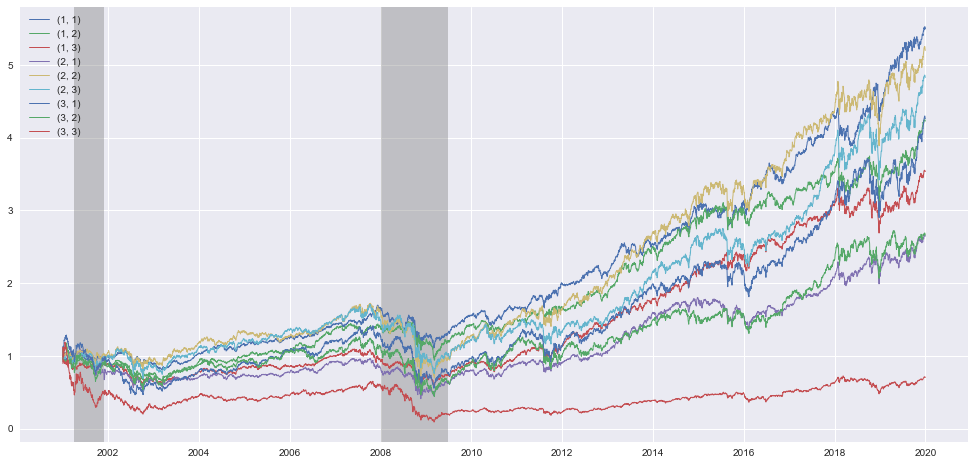

In [38]:
_ = pf_daily.plot_indices()

In [169]:
portfolios = df_merged.sort_portfolios('ret12M_ana', 'in', 5, lag=0)

In [114]:
portfolios.summarise_performance(1)

,1,2,3,4,5
Return p.a. (arithmetic),0.0855,0.0830,0.0982,0.0949,0.0558
Return p.a. (geometric),0.0777,0.0716,0.0789,0.0755,0.0129
Volatility p.a.,0.1294,0.1570,0.1959,0.1968,0.2773
Sharpe ratio,0.6001,0.4560,0.4027,0.3833,0.0465
t-stat,2.8811,2.3031,2.1846,2.1022,0.8776
Total return,3.1414,2.7199,3.2319,2.9836,0.2759
Positive returns %,78.9474,73.6842,68.4211,73.6842,68.4211
VaR 95% (historic),-0.1663,-0.1819,-0.1753,-0.3121,-0.3921
VaR 95% (parametric),-0.1273,-0.1753,-0.2240,-0.2288,-0.4003
Expected shortfall 95%,-0.1756,-0.2600,-0.4225,-0.3707,-0.5821


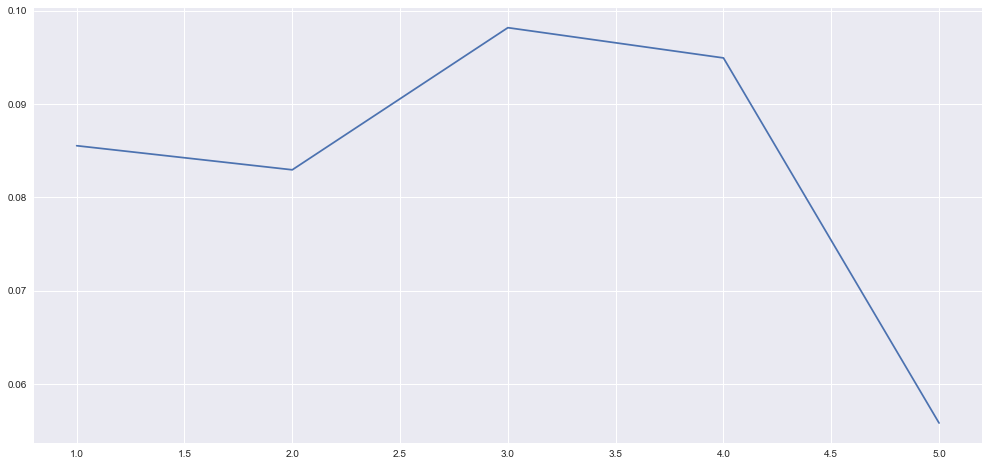

In [171]:
portfolios.returns.unstack().mean().plot()
plt.show()

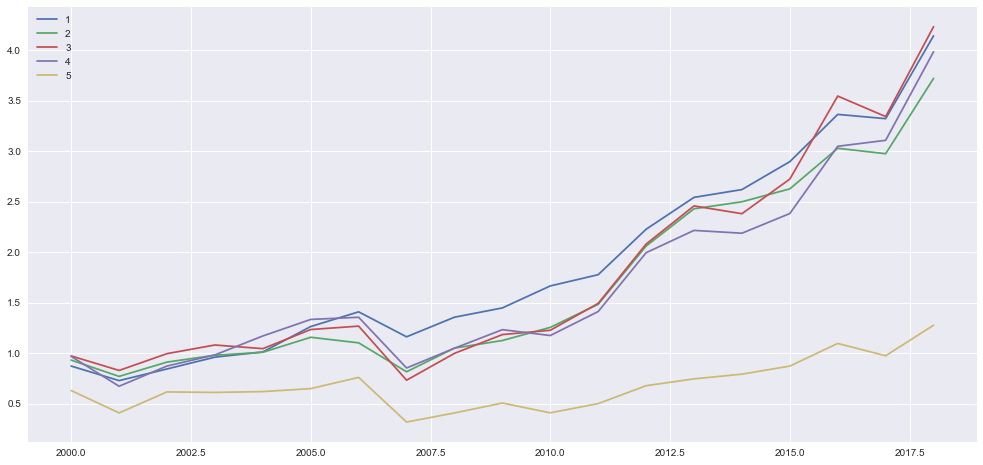

In [172]:
(portfolios.returns.unstack()+1).cumprod().plot()
plt.show()

## Factor Models

In [158]:
capm = kf.FactorModel(df_ff_raw['mktrf'])
ff3f = kf.FactorModel(df_ff_raw[['mktrf','smb','hml']])

In [173]:
_ = capm.fit(portfolios.returns.unstack()).plot_results(252, figsize=[17,12])

AssertionError: time index of supplied data needs to be pandas.DatetimeIndex

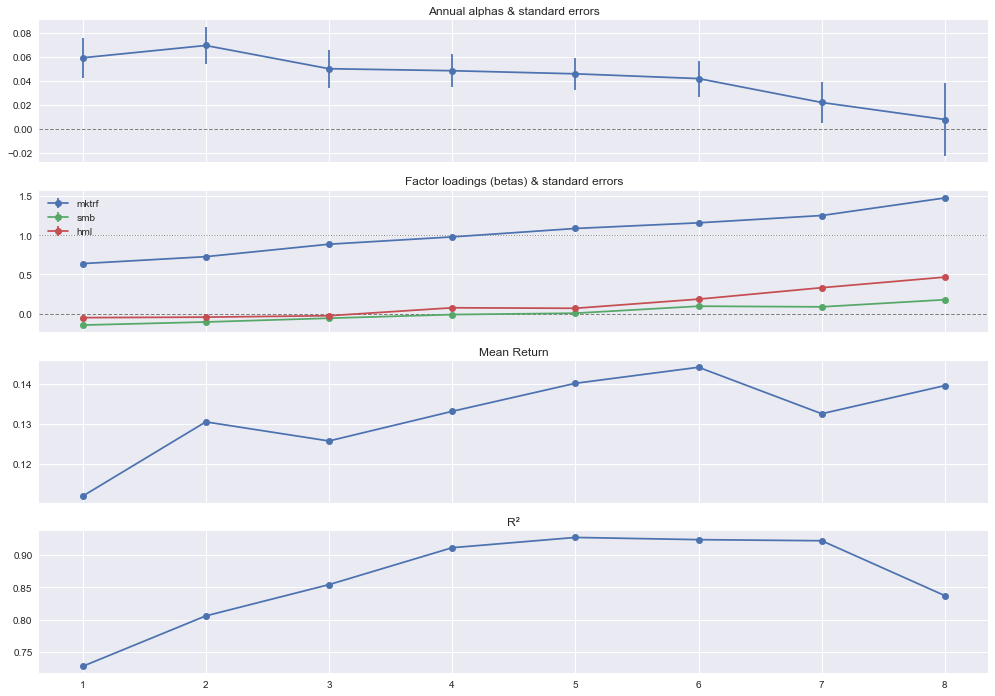

In [32]:
_ = ff3f.fit(portfolios.returns.unstack()).plot_results(252, figsize=[17,12])

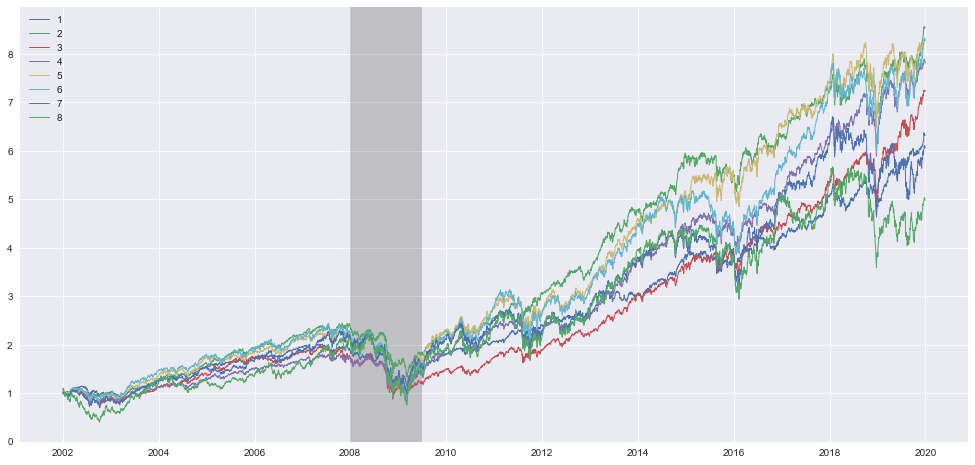

In [17]:
_ = portfolios.plot_indices()

## Indices

In [26]:
equal_index = kf.index.create_index(df_portfolio['daily_return'])
equal_index = equal_index[equal_index.index.year>=2002]
weighted_index = kf.index.create_index(df_portfolio['daily_return'], df_portfolio['incoming'], lag=1)

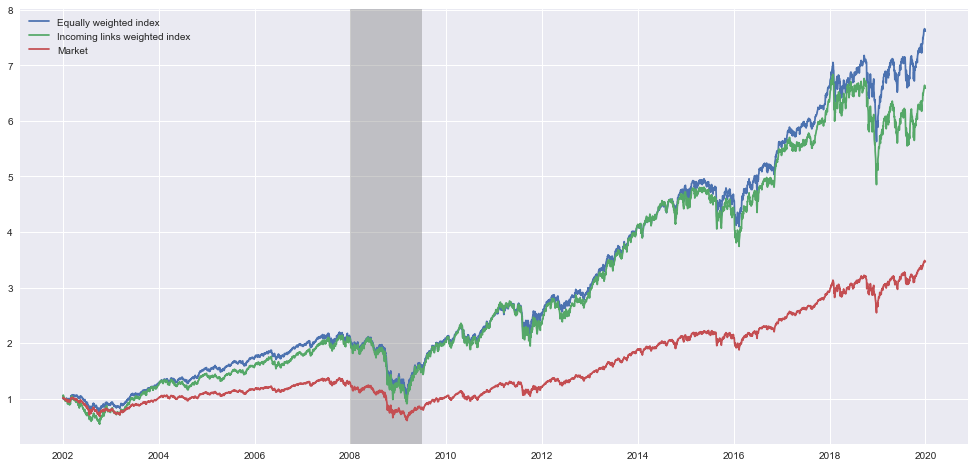

In [31]:
fig, ax = plt.subplots(1,1)

ax.plot(equal_index.to_prices(), label='Equally weighted index')
ax.plot(weighted_index.to_prices(), label='Incoming links weighted index')
ax.plot(kf.FinancialSeries(df_ff_raw['mktrf'][df_ff_raw.index.year >=2002]).set_obstype('return').to_prices(), label='Market')
ax.legend(loc='upper left')

startdate = equal_index.index[0]
enddate = equal_index.index[-1]
kf.add_recession_bars(ax, startdate=startdate, enddate=enddate)

plt.show()

In [20]:
equal_index.to_frame().join(weighted_index).summarise_performance(obstype='return', annual_obs=252)

,equal_index,weighted_index
Return p.a. (arithmetic),0.1322,0.1345
Return p.a. (geometric),0.1197,0.1108
Volatility p.a.,0.1953,0.2428
Sharpe ratio,0.6131,0.4562
t-stat,2.8703,2.3492
Total return,6.6395,5.6110
Positive returns %,54.9989,53.6526
VaR 95% (historic),-0.0182,-0.0238
VaR 95% (parametric),-0.0197,-0.0246
Expected shortfall 95%,-0.0294,-0.0363


## Factor Models

In [21]:
onefm_e = kf.FactorModel(equal_index)
onefm_w = kf.FactorModel(weighted_index)

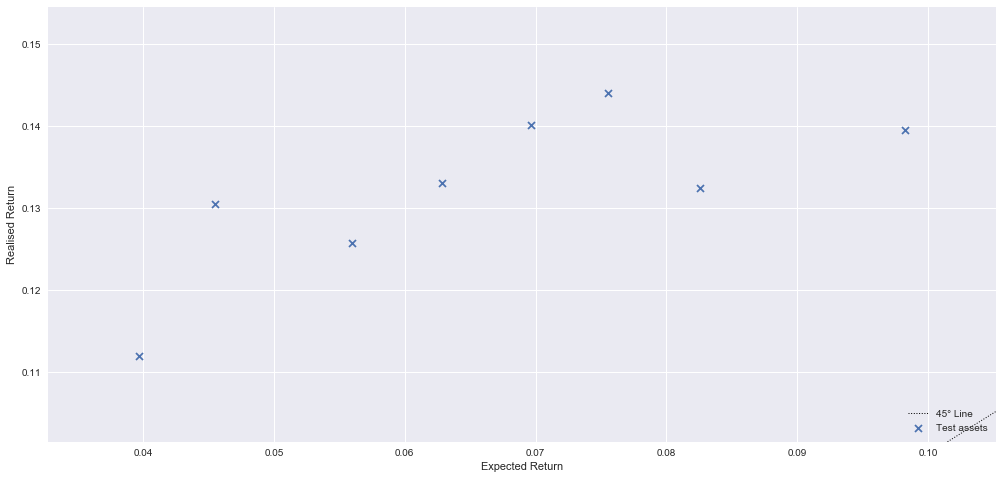

In [22]:
_ = capm.fit(portfolios.returns.unstack()).plot_predictions(252)

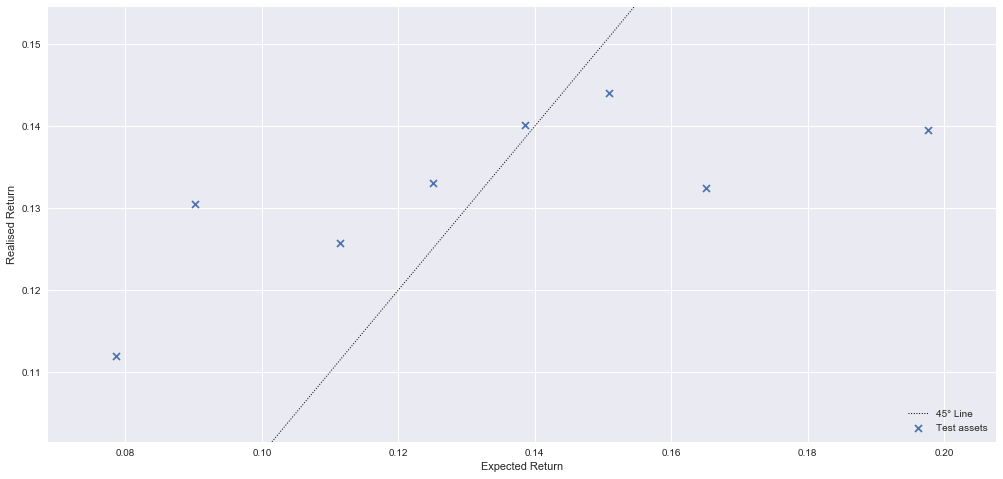

In [23]:
_ = onefm_e.fit(portfolios.returns.unstack()).plot_predictions(252)

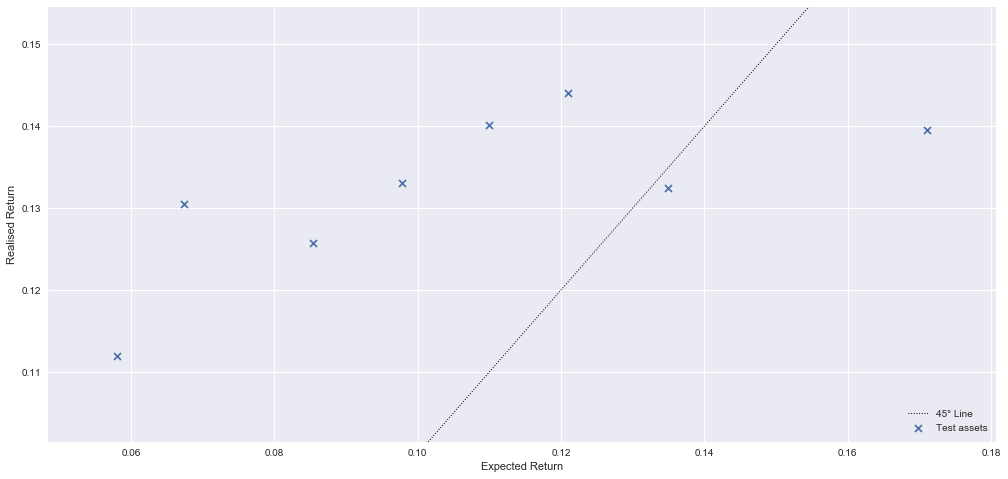

In [24]:
_ = onefm_w.fit(portfolios.returns.unstack()).plot_predictions(252)

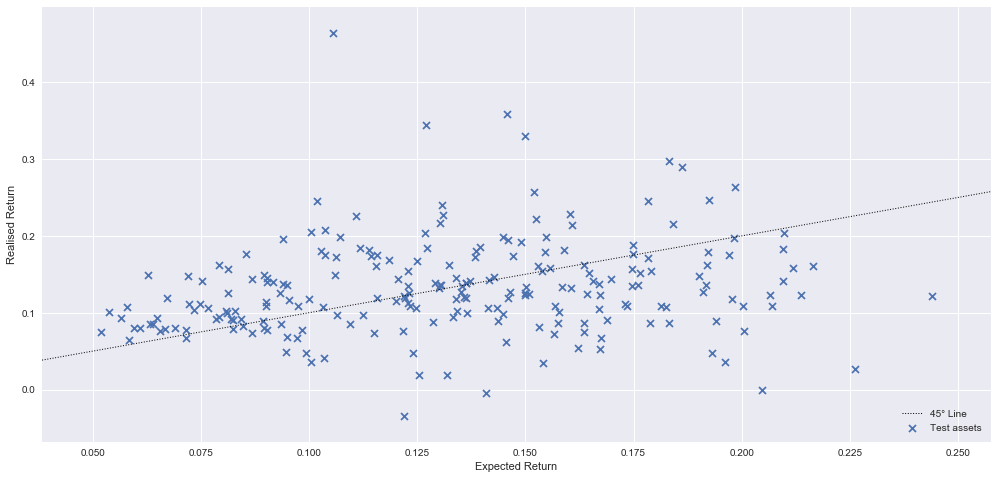

In [25]:
example = onefm_e.fit(return_matrix.iloc[500:]).plot_predictions(252)

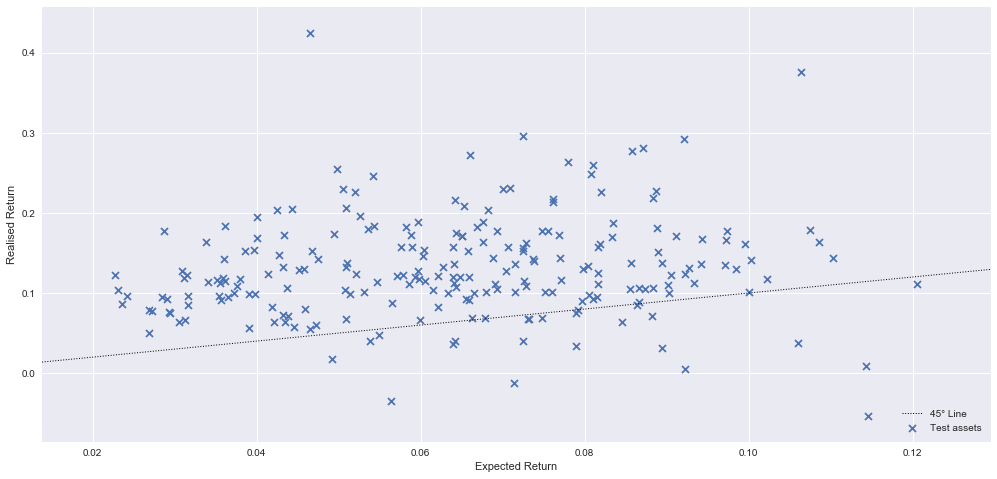

In [18]:
ex2 = capm.fit(return_matrix).plot_predictions(252)

In [26]:
onefm_e.calculate_grs_test(portfolios.returns.unstack())

(1.042709777459909, 0.40102680211333563)

In [27]:
onefm_w.calculate_grs_test(portfolios.returns.unstack())

(1.383381437766592, 0.19827450883593)

In [28]:
capm.calculate_grs_test(portfolios.returns.unstack())

(6.543596621049606, 1.622427370229218e-08)

In [23]:
portfolios.frequencies

,1,2,3,4,5,6,7,8
permno,,,,,,,,
10104,0,0,0,5,5,2,4,2
10107,0,4,3,4,1,3,3,0
10138,0,0,0,0,0,0,6,12
10145,0,0,0,1,2,7,8,0
10516,0,6,3,6,3,0,0,0
...,...,...,...,...,...,...,...,...
87432,0,0,0,0,2,4,4,8
87447,2,2,5,7,2,0,0,0
88031,10,2,3,1,0,0,1,1


In [13]:
test = df_portfolio['daily_return']
test.groupby(test.index.get_level_values(1)).quantile()

date
2000-01-03   -0.0252
2000-01-04   -0.0309
2000-01-05    0.0034
2000-01-06    0.0120
2000-01-07    0.0242
               ...  
2019-12-24   -0.0001
2019-12-26    0.0023
2019-12-27   -0.0007
2019-12-30   -0.0047
2019-12-31    0.0031
Name: daily_return, Length: 5031, dtype: float64

In [27]:
udf = df_portfolio['daily_return'].unstack(level=0)

In [30]:
udf.kf.returns_to_prices()

AttributeError: 'KungfuAccessor' object has no attribute 'returns_to_prices'

In [24]:
df_panel['capm_beta'] = np.nan
df_panel['capm_alpha'] = np.nan
for end in opt_indices:
    start = end-498
    data = return_matrix.iloc[start:end+1,:]
    year = return_matrix.index[end].year
    results = capm.fit(data)
    
    df_panel.loc[[(asset,year) for asset in return_matrix.columns],'capm_beta'] = results.betas.values
    df_panel.loc[[(asset,year) for asset in return_matrix.columns],'capm_alpha'] = results.alphas.values

In [25]:
df_performance = kf.FinancialDataFrame()
df_performance['return_1y'] = (return_matrix.groupby(pd.Grouper(freq='Y')).mean()*252).stack().swaplevel(0,1)
df_performance['return_1m'] = (return_matrix.groupby(pd.Grouper(freq='M')).mean()*252).stack().swaplevel(0,1)
df_performance['return_3m'] = (return_matrix.groupby(pd.Grouper(freq='Q')).mean()*252).stack().swaplevel(0,1)

df_performance['variance_1y'] = (return_matrix.groupby(pd.Grouper(freq='Y')).var()*252).stack().swaplevel(0,1)
df_performance['variance_1m'] = (return_matrix.groupby(pd.Grouper(freq='M')).var()*252).stack().swaplevel(0,1)
df_performance['variance_3m'] = (return_matrix.groupby(pd.Grouper(freq='Q')).var()*252).stack().swaplevel(0,1)

df_performance.index = pd.MultiIndex.from_arrays([df_performance.index.get_level_values(0),df_performance.index.get_level_values(1).year])

df_panel = df_panel.merge(df_performance, how='outer', left_index=True, right_on=['permno','date'])